<a href="https://www.kaggle.com/code/edmilsoneddi/discipline-of-artificial-intelligence-second-work?scriptVersionId=93825083" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Faculdade Metodista Granbery – Sistemas de Informação
## Inteligência Artifical –  [Prof. Ricardo Campos](https://www.linkedin.com/in/ricardo-campos-505220237/)
### Segundo trabalho 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [2]:
#Adicionar o arquivo
data_netflix = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
data_netflix[:5]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data_netflix.fillna(value='Ausente')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Ausente,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Ausente,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Ausente,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Ausente,Ausente,Ausente,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Ausente,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Ausente,Ausente,Ausente,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Filmes e Séries

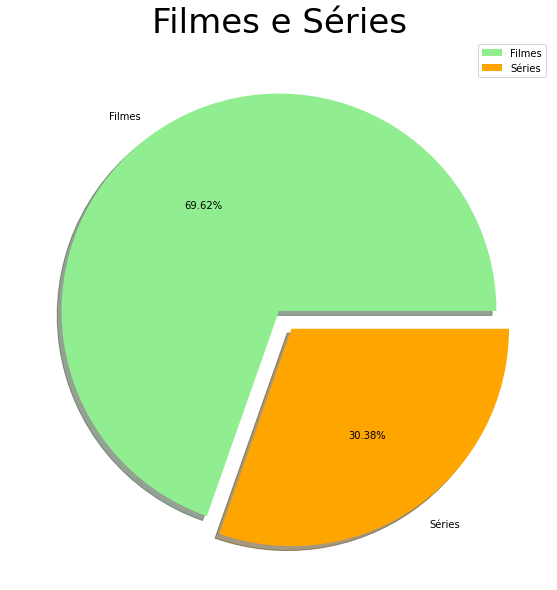

In [7]:
labels = ['Filmes', 'Séries']
size = data_netflix['type'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Filmes e Séries', fontsize = 34)
plt.axis('off')
plt.legend()
plt.show()

Trocar nomes das colunas

In [8]:
data_netflix = data_netflix.rename(columns={'date_added': 'add', 'duration': 'duration_seconds', 'listed_in': 'gender_type', 'type': 'movie_or_serie'})
data_netflix[:5]

,show_id,movie_or_serie,title,director,cast,country,add,release_year,rating,duration_seconds,gender_type,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
data_netflix['gender_type']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: gender_type, Length: 8807, dtype: object

In [10]:
df_split = data_netflix['gender_type'].str.split(',', expand=True)

In [11]:
df_split

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [12]:
df_split= df_split.fillna('VAZIO')

In [13]:
t1 = lambda x: x.strip()
df_split[0] = df_split[0].apply(t1)
df_split[1] = df_split[1].apply(t1)
df_split[2] = df_split[2].apply(t1)

In [14]:
df0 = pd.get_dummies(df_split[0]) 
df0

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df1 = pd.get_dummies(df_split[1]) 
df1

,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Thrillers,Teen TV Shows,Thrillers,VAZIO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df2 = pd.get_dummies(df_split[2]) 
df2

,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Thrillers,Teen TV Shows,Thrillers,VAZIO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#esta função faz merge entre dois datasets - se uma coluna existe nos dois, elas são somadas
def my_merge(dfA, dfB):
    #cria e inicializa o dataframe com a cópia do segundo 
    df_resultado = dfB.copy()
    #percorre a lista de colunas do primeiro dataset
    for colA in dfA.columns:
        eh_igual  = False
        #percorre a lista de colunas do segundo dataset
        for colB in dfB.columns:
            if(colA==colB):
                #se a coluna é igual, altera a flag pra true
                eh_igual = True
        #se a coluna existe nos dois dataset de entrada, soma
        if(eh_igual):
            df_resultado[colA] = dfA[colA]+dfB[colA]
        else:
            #se a coluna do primeiro dataset não existe no segundo, adiciona na saída
            df_resultado[colA] = dfA[colA]
    return df_resultado

In [18]:
df01 = my_merge(df0, df1)
df01

,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,TV Sci-Fi & Fantasy,TV Thrillers,Teen TV Shows,Thrillers,VAZIO,Action & Adventure,Anime Series,British TV Shows,Movies,TV Shows
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df012= my_merge(df2, df01)
df012

,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,TV Sci-Fi & Fantasy,TV Thrillers,Teen TV Shows,Thrillers,VAZIO,Action & Adventure,Anime Series,British TV Shows,Movies,TV Shows
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8805,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
#acrescestei o título e a coluna origina de genero no dataset com as dummies - pois depois vai facilitar a visualização.
# porém, na hora de fitar  o kmeans, passa um cópia do dataframe com estas colunas dropadas: 
#df012.drop(['title', 'gender_type'],axis=1)
df012['title'] = data_netflix['title'].str.upper()
df012['gender_type'] = data_netflix['gender_type']
df012

,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,Teen TV Shows,Thrillers,VAZIO,Action & Adventure,Anime Series,British TV Shows,Movies,TV Shows,title,gender_type
0,0,0,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0,0,DICK JOHNSON IS DEAD,Documentaries
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,BLOOD & WATER,"International TV Shows, TV Dramas, TV Mysteries"
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,GANGLANDS,"Crime TV Shows, International TV Shows, TV Act..."
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,JAILBIRDS NEW ORLEANS,"Docuseries, Reality TV"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,KOTA FACTORY,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,ZODIAC,"Cult Movies, Dramas, Thrillers"
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ZOMBIE DUMB,"Kids' TV, Korean TV Shows, TV Comedies"
8804,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,ZOMBIELAND,"Comedies, Horror Movies"
8805,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,ZOOM,"Children & Family Movies, Comedies"


In [21]:
#da pra ver quantos filmes tinham nenhuma, uma ou duas categorias em branco:
df012['VAZIO'].value_counts()

0    3729
1    3058
2    2020
Name: VAZIO, dtype: int64

In [22]:
#dropei a coliuna VAZIO pq ela não tem significado nenhum para o filme.
df012 = df012.drop('VAZIO', axis=1)
#df012_dropado = df012.drop(['title', 'gender_type'],axis=1)
#df012_dropado[115:124]

In [23]:
df_7 = df012.copy()
df_8 = df012.copy()

KMEANS

In [24]:
X = np.array(df012.drop(['title', 'gender_type'], axis=1))
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Elbow - Cotovelo

In [25]:
from sklearn.cluster import KMeans
array_ale = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    array_ale.append(kmeans.inertia_)  


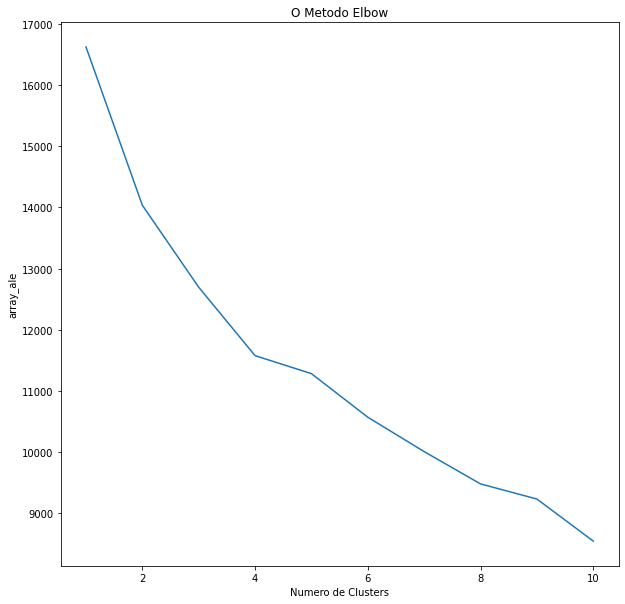

In [26]:
plt.plot(range(1, 11), array_ale)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('array_ale') #within cluster sum of squares
plt.show()

Escolhendo a melhor Cluster

Utilizando 7 Clusters

In [27]:
kmeans_model = KMeans(n_clusters = 7, random_state=0)
y_Kmeans = kmeans_model.fit_predict(X)
y_Kmeans

array([1, 4, 6, ..., 2, 2, 0], dtype=int32)

In [28]:
df_7['K-Classes'] = y_Kmeans

In [29]:
df_7[:3]

,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,Teen TV Shows,Thrillers,Action & Adventure,Anime Series,British TV Shows,Movies,TV Shows,title,gender_type,K-Classes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,DICK JOHNSON IS DEAD,Documentaries,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BLOOD & WATER,"International TV Shows, TV Dramas, TV Mysteries",4
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,GANGLANDS,"Crime TV Shows, International TV Shows, TV Act...",6


Verificando a saída do K-Classes

In [30]:
df_7[df_7['title'] ==  'NARCOS' ][['K-Classes', 'gender_type']]

,K-Classes,gender_type
5305,6,"Crime TV Shows, TV Action & Adventure, TV Dramas"


In [31]:
df_7[df_7['K-Classes'] ==  1 ][['title', 'gender_type']]

,title,gender_type
0,DICK JOHNSON IS DEAD,Documentaries
5,MIDNIGHT MASS,"TV Dramas, TV Horror, TV Mysteries"
6,MY LITTLE PONY: A NEW GENERATION,Children & Family Movies
8,THE GREAT BRITISH BAKING SHOW,"British TV Shows, Reality TV"
15,DEAR WHITE PEOPLE,"TV Comedies, TV Dramas"
...,...,...
8785,YOM,Kids' TV
8786,YOU CAN TUTU,Children & Family Movies
8795,YU-GI-OH! ARC-V,"Anime Series, Kids' TV"
8797,ZAK STORM,Kids' TV


Utilizando 8 Clusters

In [32]:
kmeans_model = KMeans(n_clusters = 8, random_state=0)
g_Kmeans = kmeans_model.fit_predict(X)
g_Kmeans

array([7, 4, 4, ..., 2, 5, 0], dtype=int32)

In [33]:
df_8['K-Classes'] = g_Kmeans

In [34]:
df_8[:3]

,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,Teen TV Shows,Thrillers,Action & Adventure,Anime Series,British TV Shows,Movies,TV Shows,title,gender_type,K-Classes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,DICK JOHNSON IS DEAD,Documentaries,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BLOOD & WATER,"International TV Shows, TV Dramas, TV Mysteries",4
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,GANGLANDS,"Crime TV Shows, International TV Shows, TV Act...",4


Verificando a saída do K-Classes

In [35]:
df_8[df_8['title'] ==  'NARCOS' ][['K-Classes', 'gender_type']]

,K-Classes,gender_type
5305,4,"Crime TV Shows, TV Action & Adventure, TV Dramas"


Utilzando o 8 Clusters o Kmeans obtve maior precisão, em seus dados,
trazendo resultados bem mais próximos que o dataset(df_7)
utilizando apenas 7 Clusters

In [36]:
df_8[df_8['K-Classes'] ==  5 ][['title', 'gender_type']][:20]

,title,gender_type
6,MY LITTLE PONY: A NEW GENERATION,Children & Family Movies
13,CONFESSIONS OF AN INVISIBLE GIRL,"Children & Family Movies, Comedies"
23,GO! GO! CORY CARSON: CHRISSY TAKES THE WHEEL,Children & Family Movies
64,NIGHTBOOKS,Children & Family Movies
71,A STORYBOTS SPACE ADVENTURE,Children & Family Movies
75,YOU VS. WILD: OUT COLD,Children & Family Movies
77,LITTLE SINGHAM - BLACK SHADOW,"Children & Family Movies, Comedies"
80,FIREDRAKE THE SILVER DRAGON,Children & Family Movies
94,SHOW DOGS,"Children & Family Movies, Comedies"
107,A CHAMPION HEART,"Children & Family Movies, Dramas"


Sistema de recomendação de Filmes e Séries

In [37]:
def recomenda_filme(nome):
    nome_pesquisa = nome.upper()
    # Recebe o valor da id K-Classes
    filme = df_8[df_8['title'] == nome_pesquisa][['K-Classes']]
    # resetar o index, como possui apenas um linha, acessar mais rápido
    reseta_filme = filme.reset_index()
    # Adicionar a célula da K-Classes, a uma variável
    resetado_filme = reseta_filme.at[0, 'K-Classes']
    # Transforma variável string em inteiro
    k_id = int(resetado_filme)
    # Procura filmes com semelhança usando a k-id = K-Classes
    recomendacoes = df_8[df_8['K-Classes'] == k_id][['title', 'gender_type']][:10]
    return recomendacoes
recomenda_filme('Narcos')

,title,gender_type
1,BLOOD & WATER,"International TV Shows, TV Dramas, TV Mysteries"
2,GANGLANDS,"Crime TV Shows, International TV Shows, TV Act..."
4,KOTA FACTORY,"International TV Shows, Romantic TV Shows, TV ..."
10,"VENDETTA: TRUTH, LIES AND THE MAFIA","Crime TV Shows, Docuseries, International TV S..."
11,BANGKOK BREAKING,"Crime TV Shows, International TV Shows, TV Act..."
17,FALSA IDENTIDAD,"Crime TV Shows, Spanish-Language TV Shows, TV ..."
19,JAGUAR,"International TV Shows, Spanish-Language TV Sh..."
20,MONSTERS INSIDE: THE 24 FACES OF BILLY MILLIGAN,"Crime TV Shows, Docuseries, International TV S..."
21,RESURRECTION: ERTUGRUL,"International TV Shows, TV Action & Adventure,..."
25,LOVE ON THE SPECTRUM,"Docuseries, International TV Shows, Reality TV"
